# Load data

In [2]:
data_dir = '~/_research/ADA/simulation_SSM';

In [3]:
load(sprintf('%s/data_simulation_11.mat',data_dir))

In [4]:
data_0 = permute(data_0, [2 1 3]);
data_1 = permute(data_1, [2 1 3]);

In [5]:
size(data_0), size(data_1)


ans =

          25          50        1000


ans =

          25          50        1000



# Load external package

In [1]:
addpath('../../../_external/DKCCA/simulationFiles', ...
        '../../../_external/DKCCA/util', ...
        '../../../_external/DKCCA');

In [9]:
numpermute=0;  % this is too low, but is set here for speed.  
setnumperwindow=1;
windowlength=11;
numcomponents=1;
regwindow=.7:.1:1;
gsdval=5;

In [10]:
[dcell, ca, reg, dirsa, kernelMats, corcells] = DKCCA(data_0, data_1, setnumperwindow, windowlength, numpermute, numcomponents, regwindow, gsdval);

> In regionprops>NoNDSupport (line 1541)
In regionprops>PreprocessRequestedStats (line 1572)
In regionprops>InitializeStatStructures (line 1512)
In regionprops (line 250)
In get_statistics (line 50)
In DKCCA (line 39)
> In regionprops>NoNDSupport (line 1541)
In regionprops>ComputeEllipseParams (line 817)
In regionprops (line 315)
In get_statistics (line 50)
In DKCCA (line 39)
> In regionprops>NoNDSupport (line 1544)
In regionprops>ComputeConvexHull (line 1116)
In regionprops (line 331)
In get_statistics (line 50)
In DKCCA (line 39)


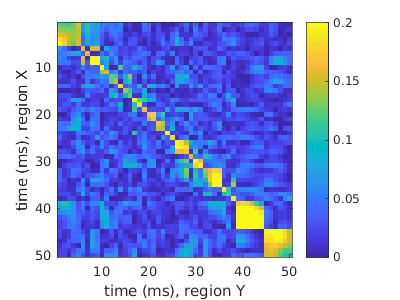

In [11]:
%plot -s 400,300
imagesc(dcell.original)
% colormap rdbu
caxis([0 0.2])
colorbar
axis square
xlabel('time (ms), region Y')
ylabel('time (ms), region X')

In [56]:
wX = zeros(size(data_0, 1), size(data_0, 2));
wY = zeros(size(data_1, 1), size(data_1, 2));

In [57]:
if ~mod(windowlength, 2)
    %even
    cent=floor(mean(1:windowlength));
    offset=(setnumperwindow/2) - 1;
    offsetright=setnumperwindow/2;
else
    %odd
    cent=mean(1:windowlength);
    offset=floor(setnumperwindow/2);
    offsetright=offset;
end

In [58]:
finnum=cent+offsetright;

In [59]:
wXstack = reshape(reshape( ...
    data_0(:,1:windowlength,:), ...
    [size(data_0,1)*windowlength, size(data_0,3)] ...
) * dirsa{1,1}, [size(data_0,1), windowlength]);

wYstack = reshape(reshape( ...
    data_1(:,1:windowlength,:), ...
    [size(data_1,1)*windowlength, size(data_1,3)] ...
) * dirsa{2,1}, [size(data_1,1), windowlength]);

for lind=1:finnum
    wX(:,lind) = wXstack(:,lind);
    wY(:,lind) = wYstack(:,lind);
end

In [60]:
for lind=(finnum+1):(size(data_0,2)-(finnum+1))
    wXstack = reshape(reshape( ...
        data_0(:,lind-finnum+1:lind+windowlength-finnum,:), ...
        [size(data_0,1)*windowlength, size(data_0,3)] ...
    ) * dirsa{1,lind-finnum+1}, [size(data_0,1), windowlength]);

    wYstack = reshape(reshape( ...
        data_1(:,lind-finnum+1:lind+windowlength-finnum,:), ...
        [size(data_1,1)*windowlength, size(data_1,3)] ...
    ) * dirsa{2,lind-finnum+1}, [size(data_1,1), windowlength]);
    
    wX(:,lind) = wXstack(:,cent);
    wY(:,lind) = wYstack(:,cent);
end

Index in position 2 is invalid. Array indices must be positive integers or logical values.



In [61]:
wXstack = reshape(reshape( ...
    data_0(:,size(data_0,2)-windowlength+1:size(data_0,2),:), ...
    [size(data_0,1)*windowlength, size(data_0,3)] ...
) * dirsa{1,size(data_0,2)-windowlength+1}, [size(data_0,1), windowlength]);

wYstack = reshape(reshape( ...
    data_1(:,size(data_1,2)-windowlength+1:size(data_1,2),:), ...
    [size(data_1,1)*windowlength, size(data_1,3)] ...
) * dirsa{2,size(data_1,2)-windowlength+1}, [size(data_1,1), windowlength]);
    
for lind=(size(data_0,2)-finnum):size(data_0,2)
    wX(:,lind) = wXstack(:,lind+windowlength-size(data_0,2));
    wY(:,lind) = wYstack(:,lind+windowlength-size(data_0,2));
end

Index in position 2 is invalid. Array indices must be positive integers or logical values.



In [41]:
Sigma_DKCCA = dcell.original;
latent_DKCCA = corcells;
save(sprintf('%s/result_simulation_11_DKCCA.mat', data_dir), 'Sigma_DKCCA', 'latent_DKCCA', 'wX', 'wY')